<a href="https://colab.research.google.com/github/Rajat-Kumar-Pandey/MACHINE-LEARNING/blob/main/HousePrice_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: xlabel='area', ylabel='price'>

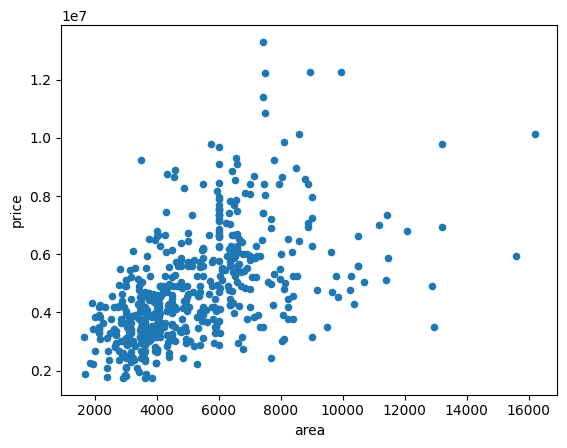

In [5]:
%matplotlib inline
df.plot(kind='scatter',x='area',y='price')

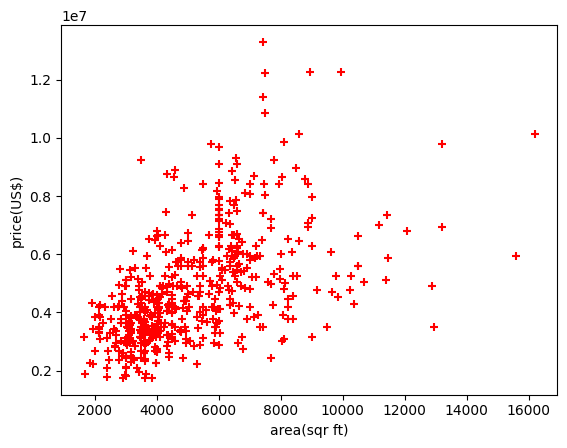

In [6]:
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [7]:
# Assuming 'df' has multiple feature columns, for example: 'area', 'bedrooms', 'bathrooms', 'floors'
features = ['area', 'bedrooms', 'bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']

#
target = 'price'
# Identify non-numeric columns and encode them
df_encoded = pd.get_dummies(df[features], drop_first=True)  # This will one-hot encode categorical columns



In [8]:
df_encoded.describe()

,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.693578
std,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,3.000000


Fitting area and prise to the linear regressioon modal


In [9]:
reg = linear_model.LinearRegression()
reg.fit(df_encoded, df[target])

LinearRegression()

In [10]:
# Create an input with 13 features: set 'area' to 3300 and placeholders (e.g., mean or zeros) for other features
sample_input = np.array([[3300] + [0] * (df_encoded.shape[1] - 1)])  # Adjust to use actual feature values if needed

# Predict the price
predicted_price = reg.predict(sample_input)
print(predicted_price)

[848431.6686149]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# Calculate the mean values for each feature as the default.
default_values = df_encoded.mean()
default_values

,0
area,5150.541284
bedrooms,2.965138
bathrooms,1.286239
stories,1.805505
parking,0.693578
mainroad_yes,0.858716
guestroom_yes,0.177982
basement_yes,0.350459
hotwaterheating_yes,0.045872
airconditioning_yes,0.315596


In [12]:
# reg.intercept_

def preprocess_input(user_input):
    # Map categorical values to numeric values
    mappings = {
        'yes': 1,
        'no': 0,
        'furnished': 1,
        'semi-furnished': 0.5,
        'unfurnished': 0
    }

    # Apply mappings and ensure numeric values are cast to float
    processed_input = {}
    for feature, value in user_input.items():
        if isinstance(value, str):
            # Check if the string can be converted to an integer
            if value.isdigit():
                processed_input[feature] = float(value)  # Convert numeric strings to float
            else:
                processed_input[feature] = float(mappings.get(value, value))
        else:
            processed_input[feature] = float(value)  # Convert non-string values to float directly

    return processed_input


# Create a function to handle flexible input
def predict_price(user_input):
    # Create a full feature array initialized with default values
    full_features = default_values.copy()

    # Update with processed user input where available
    processed_input = preprocess_input(user_input)
    for feature, value in processed_input.items():
        if feature in full_features:
            full_features[feature] = value

    # Ensure all values in full_features are floats
    full_features = full_features.astype(float)

    # Reshape to fit model input format and predict
    prediction = reg.predict([full_features.values])
    return prediction[0]


using y=mx+c to find the area under the graph


In [13]:
# #y= m*x+c
# m=reg.coef_
# c=reg.intercept_
# x=3300
# y=m*x+c
# y

# Example usage
user_input = {
    'area': 7420,
    'bedrooms': 4,
    'bathrooms': 2,
    'stories': 3,
    'mainroad': 'yes',
    'guestroom': 'no',
    'basement': 'no',
    'hotwaterheating': 'no',
    'airconditioning': 'yes',
    'parking': '2',
    'prefarea': 'yes',
    'furnishingstatus': 'furnished'
}

predicted_price = predict_price(user_input)
print(f"Predicted price: {predicted_price}")

Predicted price: 7045096.962022802


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The above value of y is equal to the predicted price of the house

In [14]:
import joblib
# Save the model to a file
joblib.dump(reg, 'house_price_model.pkl')


['house_price_model.pkl']

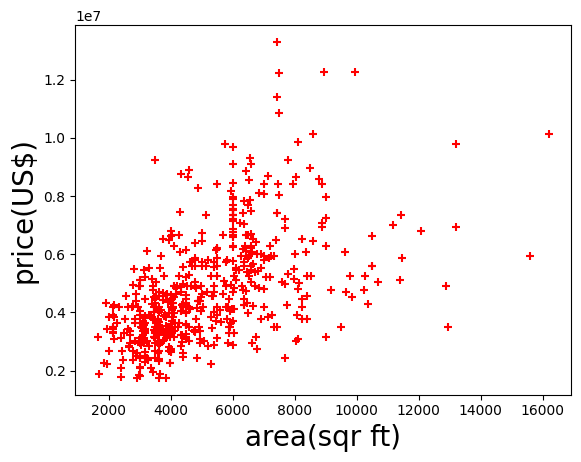

In [15]:
%matplotlib inline
plt.xlabel('area(sqr ft)',fontsize=20)
plt.ylabel('price(US$)',fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
#plt.plot(df.area,reg.predict(df[['area']]),color='blue')

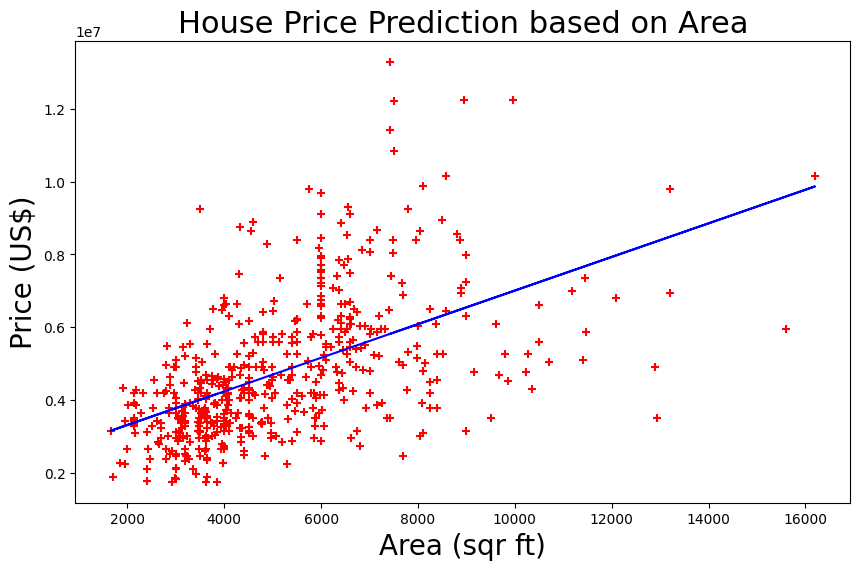

In [18]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a new model and fit it on just 'area' and 'price'
reg_single = LinearRegression()
reg_single.fit(df[['area']], df['price'])

# Plotting
plt.figure(figsize=(10, 6))
plt.xlabel('Area (sqr ft)', fontsize=20)
plt.ylabel('Price (US$)', fontsize=20)
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.plot(df['area'], reg_single.predict(df[['area']]), color='blue')
plt.title('House Price Prediction based on Area', fontsize=22)
plt.show()
